In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\ammad\\Desktop\\Steel Plate Faults\\Faults.csv")
label = df.Fault
df = df.drop('Fault',axis=1)
print(df.shape)
df.head()

(1941, 27)


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000


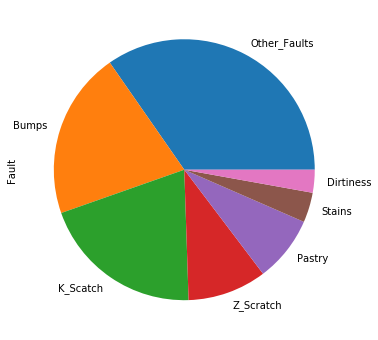

In [2]:
label.value_counts().plot.pie(figsize=(6,6))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, label, random_state = 42,test_size=0.2)
print("train:", X_train.shape, "test:", X_test.shape)

train: (1552, 27) test: (389, 27)


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
gbc = GradientBoostingClassifier(n_estimators=500, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [5]:
print(accuracy_score(y_test, gbc.predict(X_test)))
print(classification_report(y_test, gbc.predict(X_test)))

0.8046272493573264
              precision    recall  f1-score   support

       Bumps       0.65      0.74      0.69        72
   Dirtiness       0.55      0.75      0.63         8
    K_Scatch       0.95      0.95      0.95        83
Other_Faults       0.77      0.77      0.77       143
      Pastry       0.75      0.52      0.61        29
      Stains       1.00      0.92      0.96        13
   Z_Scratch       1.00      0.93      0.96        41

    accuracy                           0.80       389
   macro avg       0.81      0.80      0.80       389
weighted avg       0.81      0.80      0.81       389



In [6]:
### EXCLUDE OTHER_FAULTS FROM TRAIN & TEST ###

X_train2, y_train2 = X_train[y_train != 'Other_Faults'].copy(), y_train[y_train != 'Other_Faults'].copy()
X_test2, y_test2 = X_test[y_test != 'Other_Faults'].copy(), y_test[y_test != 'Other_Faults'].copy()

print("train:", X_train2.shape, "test:", X_test2.shape)

train: (1022, 27) test: (246, 27)


In [7]:
gbc2 = GradientBoostingClassifier(n_estimators=500, random_state=42)
gbc2.fit(X_train2, y_train2)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [8]:
print(accuracy_score(y_test2, gbc2.predict(X_test2)))
print(classification_report(y_test2, gbc2.predict(X_test2)))

0.8983739837398373
              precision    recall  f1-score   support

       Bumps       0.82      0.86      0.84        72
   Dirtiness       0.88      0.88      0.88         8
    K_Scatch       0.99      0.98      0.98        83
      Pastry       0.69      0.69      0.69        29
      Stains       1.00      0.92      0.96        13
   Z_Scratch       1.00      0.95      0.97        41

    accuracy                           0.90       246
   macro avg       0.89      0.88      0.89       246
weighted avg       0.90      0.90      0.90       246

